In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.result import marginal_counts
from qiskit.circuit.library import RXGate, CXGate, CZGate
from TN_circuit import*

In [29]:
n_qubits = 10
mps_order = list(range(n_qubits))
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])
Id = np.eye(2)

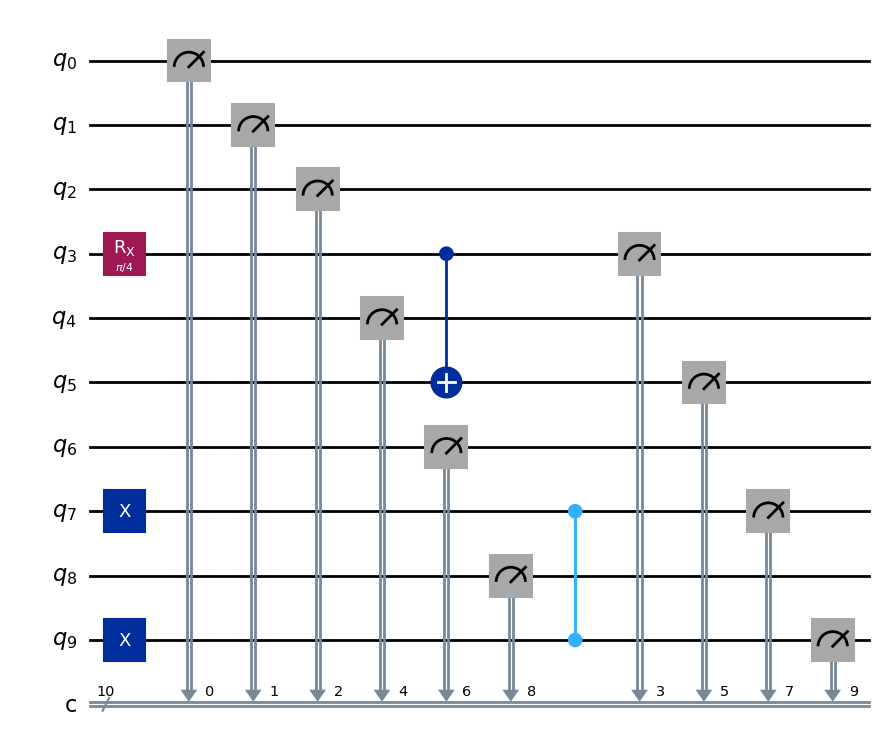

In [30]:
qc = QuantumCircuit(n_qubits, n_qubits)
qc.rx(np.pi/4, 3)
qc.cx(3,5)
qc.x(7)
qc.x(9)
qc.cz(7,9)
for i in range(n_qubits):
    qc.measure(i,i)
qc.draw(output='mpl')

In [31]:
shots = 10000
backend = AerSimulator()
job = backend.run(qc, shots=shots)
counts = job.result().get_counts()

In [32]:
z_exp_vals = []
for i in range(n_qubits):
    m_counts = marginal_counts(counts, [i])
    z_exp_vals.append((m_counts.get('0', 0)-m_counts.get('1', 0))/shots)
    

In [38]:
rx_pi4 = RXGate(np.pi/4).to_matrix()
tn_circ = TNCircuit(mps_order, chi_max=200) #max bond dimension of the underlying MPS
tn_circ.initialize_state(0) #args 0, 1, 'GHZ': coeffs -> coeffs[0]*all0state + coeffs[1]*all1state, [0,1,0,1]
tn_circ.apply_single_q_gate(4, rx_pi4) #qubit, numpy array, 'x', 'y', 'z'
tn_circ.apply_controlled_gates([3,6],[5,7],[X,Z]) #control, target, unitary 
tn_circ.apply_single_q_gate(7,'x')
tn_circ.apply_single_q_gate(9, 'x')
tn_circ.apply_controlled_gates(7,9,Z)

z_exp_vals_tn = []
for i in range(n_qubits-3):
    z_exp_vals_tn.append(tn_circ.meas_product_op_expectation_val(i, ['Sigmaz', 'Id', 'Sigmax'])) #add identities where required in non-contiguous blocks ZIX starting at index 7

In [34]:
print(z_exp_vals)
print(z_exp_vals_tn)

[1.0, 1.0, 1.0, 0.7092, 1.0, 0.7092, 1.0, -1.0, 1.0, -1.0]
[(1+0j), (1+0j), (1+0j), (1+0j), (0.7071067811865476+0j), (1+0j), (1+0j), (-1+0j), (1+0j), (-1+0j)]


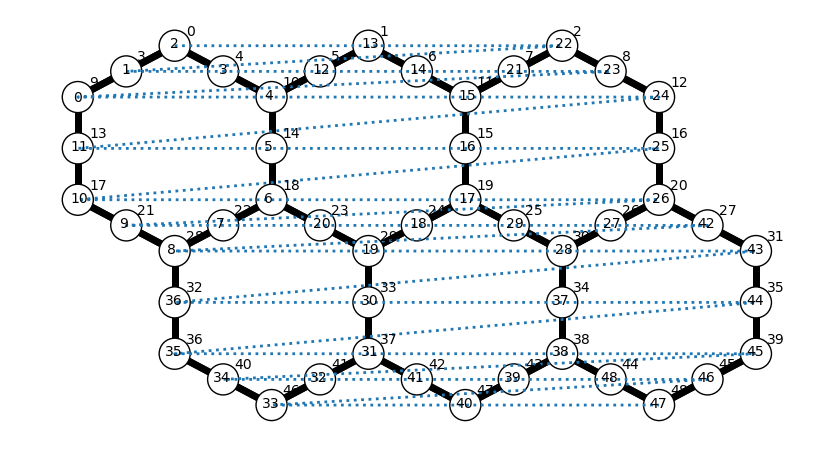

In [3]:
from lattice_afi import lattice_2d
lat = lattice_2d(nx=3, ny=2)
lat.draw(show_gates=False, show_mps_order=True, enumerate_qubits=True)